In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import preprocessing_utils as putil

In [4]:
_, _, _, _, df = putil.preprocess()

/Users/sahara/Documents/GW/DataMining/Final-Project-Group2/sahara-ensley-individual-project/Code/preprocessing_utils.py:385: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['actors_split'] = df_train['actors'].str.split(',', expand = False)


In [88]:
base = '/Users/sahara/Documents/GW/DataMining/Final-Project-Group2'
ratings, movies, names, inflation, title_principals = putil.load_all(base)
inflation_clean = putil.clean_inflation(inflation)
movies = putil.merge_and_clean_movies(movies, ratings, inflation_clean)
names = putil.merge_and_clean_names(names, title_principals)

In [6]:
df.columns

Index(['duration', 'weighted_average_vote', 'budget_adjusted',
       'usa_gross_income_adjusted', 'worldwide_gross_income_adjusted',
       'date_published_year', 'date_published_month', 'date_published_day',
       'actors_weighted_frequency', 'director_weighted_frequency',
       'writer_weighted_frequency', 'production_company_frequency', 'genre_1',
       'genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6', 'genre_7',
       'genre_8', 'genre_9', 'genre_10', 'title_n_words',
       'title_ratio_long_words', 'title_ratio_vowels',
       'title_ratio_capital_letters', 'description_n_words',
       'description_ratio_long_words', 'description_ratio_vowels',
       'description_ratio_capital_letters', 'region_Africa', 'region_Americas',
       'region_Asia', 'region_Europe', 'region_None', 'region_Oceania'],
      dtype='object')

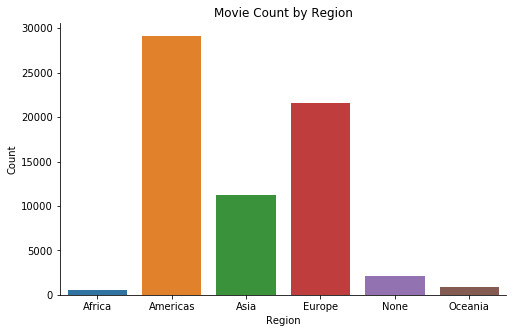

In [161]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,5))
regions = df[['region_Africa', 'region_Americas',
       'region_Asia', 'region_Europe', 'region_None', 'region_Oceania']].sum()
labs = [x[x.find('_')+1:] for x in regions.index]
sns.barplot(x = labs, y = regions.values, ax = ax)
ax.set_title("Movie Count by Region")
ax.set_xlabel('Region')
ax.set_ylabel('Count')
sns.despine()

/Users/sahara/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/sahara/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/sahara/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


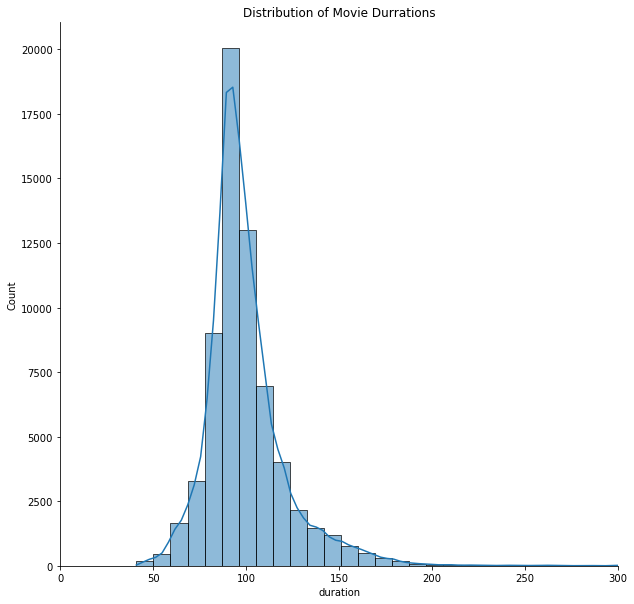

In [51]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10))
sns.histplot(data = df, x = 'duration', ax = ax, kde = True, bins = 75)
ax.set_xlim((0,300))
ax.set_title('Distribution of Movie Durrations')
sns.despine()

/Users/sahara/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/sahara/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/sahara/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


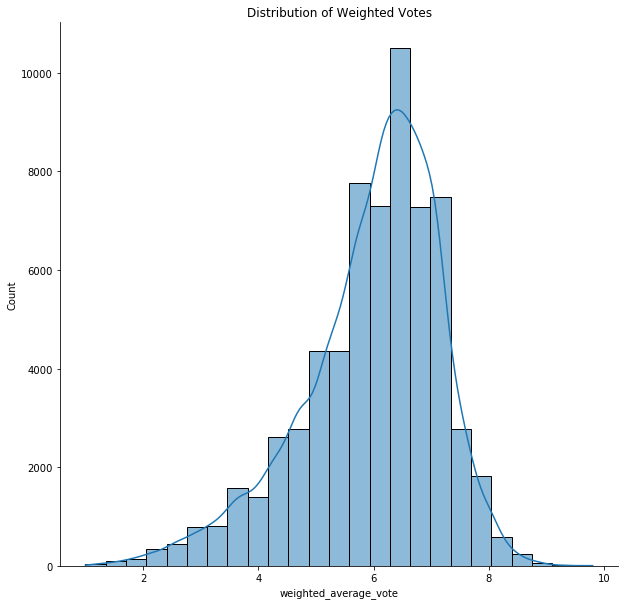

In [62]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10))
sns.histplot(data = df, x = 'weighted_average_vote', ax = ax, bins = 25, kde = True)
ax.set_title('Distribution of Weighted Votes')
sns.despine()

/Users/sahara/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/Users/sahara/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/sahara/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


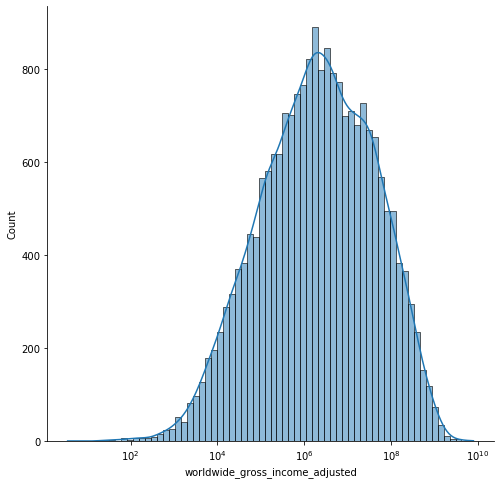

In [150]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))
sns.histplot(data = df, x = 'worldwide_gross_income_adjusted', ax = ax, kde = True, log_scale = True)
sns.despine()

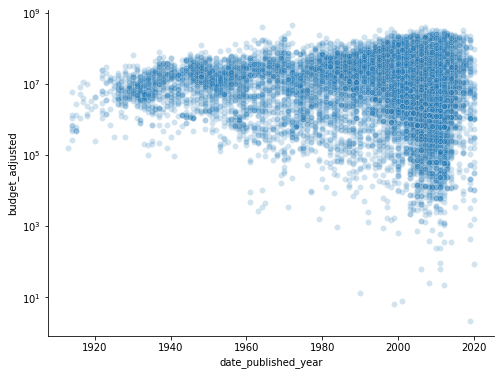

In [130]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,6))
p = sns.scatterplot(data = df, x = 'date_published_year', y = 'budget_adjusted', alpha = 0.2, ax = ax)
p.set(yscale = 'log')
ax.set_title('Budget by Date')
sns.despine()

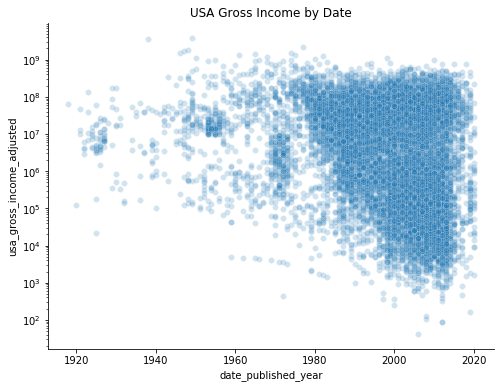

In [133]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,6))
p = sns.scatterplot(data = df, x = 'date_published_year', y = 'usa_gross_income_adjusted', alpha = 0.2, ax = ax)
p.set(yscale = 'log')
ax.set_title('USA Gross Income by Date')
ax.set_ylabel('USA Gross Income (Adjusted)')
ax.set_xlabel('Year Published')
sns.despine()

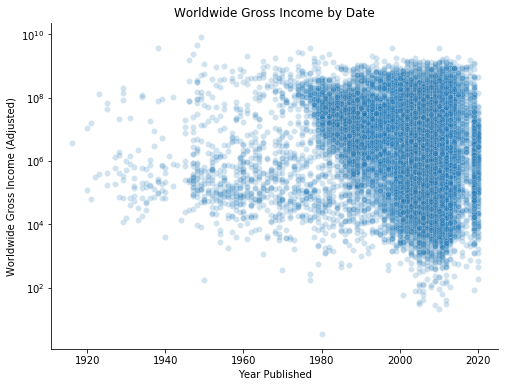

In [149]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,6))
p = sns.scatterplot(data = df, x = 'date_published_year', y = 'worldwide_gross_income_adjusted', alpha = 0.2, ax = ax)
p.set(yscale = 'log')
ax.set_title('Worldwide Gross Income by Date')
ax.set_ylabel('Worldwide Gross Income (Adjusted)')
ax.set_xlabel('Year Published')
sns.despine()

In [30]:
income = df[['worldwide_gross_income_adjusted', 'usa_gross_income_adjusted','date_published_year']]
income_melt = income.melt(id_vars = ['date_published_year'], value_vars = ['worldwide_gross_income_adjusted', 'usa_gross_income_adjusted'], var_name = ['money'])
income_melt

,date_published_year,money,value
0,1940,worldwide_gross_income_adjusted,NaN
1,1985,worldwide_gross_income_adjusted,NaN
2,2008,worldwide_gross_income_adjusted,1.075860e+07
3,2005,worldwide_gross_income_adjusted,NaN
4,1933,worldwide_gross_income_adjusted,NaN
...,...,...,...
131043,1961,usa_gross_income_adjusted,NaN
131044,2003,usa_gross_income_adjusted,NaN
131045,2012,usa_gross_income_adjusted,9.849818e+03
131046,1938,usa_gross_income_adjusted,NaN


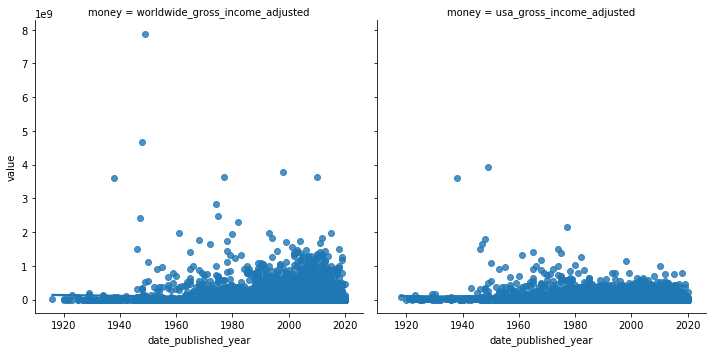

In [34]:
sns.lmplot(data = income_melt, x = 'date_published_year', y = 'value', col = 'money')

In [71]:
df.columns

Index(['duration', 'weighted_average_vote', 'budget_adjusted',
       'usa_gross_income_adjusted', 'worldwide_gross_income_adjusted',
       'date_published_year', 'date_published_month', 'date_published_day',
       'actors_weighted_frequency', 'director_weighted_frequency',
       'writer_weighted_frequency', 'production_company_frequency', 'genre_1',
       'genre_2', 'genre_3', 'genre_4', 'genre_5', 'genre_6', 'genre_7',
       'genre_8', 'genre_9', 'genre_10', 'title_n_words',
       'title_ratio_long_words', 'title_ratio_vowels',
       'title_ratio_capital_letters', 'description_n_words',
       'description_ratio_long_words', 'description_ratio_vowels',
       'description_ratio_capital_letters', 'region_Africa', 'region_Americas',
       'region_Asia', 'region_Europe', 'region_None', 'region_Oceania'],
      dtype='object')

In [103]:
movies.columns

Index(['duration', 'title', 'date_published', 'genre', 'director', 'writer',
       'production_company', 'actors', 'weighted_average_vote',
       'males_allages_avg_vote', 'females_allages_avg_vote', 'description',
       'imdb_title_id', 'budget_adjusted', 'usa_gross_income_adjusted',
       'worldwide_gross_income_adjusted', 'genre1', 'genre2', 'genre3',
       'region'],
      dtype='object')

Text(0.5, 21.70625000000002, 'Budget (Adjusted)')

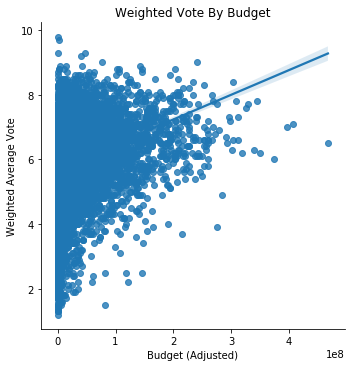

In [148]:
a = sns.lmplot(data = df, x = 'budget_adjusted', y = 'weighted_average_vote')
a.figure.axes[0].set_title('Weighted Vote By Budget')
a.figure.axes[0].set_ylabel('Weighted Average Vote')
a.figure.axes[0].set_xlabel('Budget (Adjusted)')

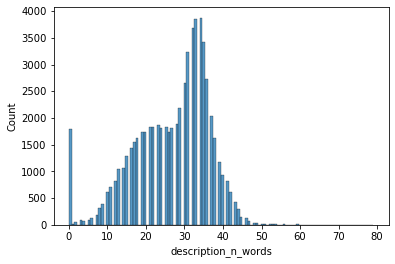

In [112]:
sns.histplot(data = df, x = 'description_n_words')

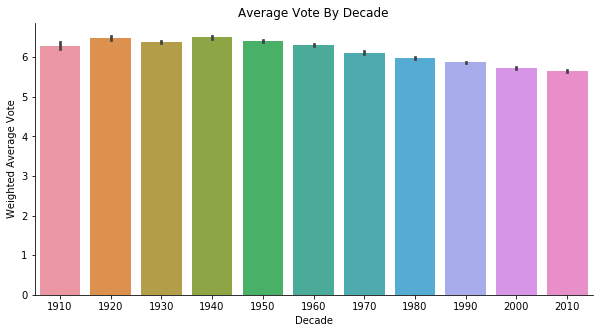

In [147]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,5))
df['decade'] = pd.cut(df['date_published_year'], np.arange(1910, 2030, 10))
sns.barplot(data = df, x = 'decade', y = 'weighted_average_vote', ax = ax)
labs = np.arange(1910,2300, 10)
t = ax.set_xticklabels(labs)
ax.set_title('Average Vote By Decade')
ax.set_xlabel('Decade')
ax.set_ylabel("Weighted Average Vote")
sns.despine()